# <span style="color:green; font-family:Arial, sans-serif; font-weight:bold;"><u><center>Credit  Score  Classification</center></u></span>



<h2 style='color:Orange'>Project Summary</h2>

This project focuses on analyzing a comprehensive dataset of customer credit information to understand and predict credit scores. The dataset includes various attributes related to customer demographics, financial behavior, and credit history, which will be explored to gain insights into factors affecting creditworthiness.

**Dataset Description**
The dataset consists of the following key attributes:

ID: Unique identifier for each record.

Customer_ID: Unique identifier for each customer.

Month: The month in which the data was recorded.

Name: Customer's name.

Age: Customer's age.

SSN: Social Security Number.

Occupation: Customer's occupation.

Annual_Income: The annual income of the customer.

Monthly_Inhand_Salary: The amount of salary the customer receives monthly.

Num_Bank_Accounts: The number of bank accounts held by the customer.

Credit Mix: The type of credit accounts the customer has (e.g., credit cards, loans).

Outstanding_Debt: The total outstanding debt of the customer.

Credit_Utilization_Ratio: The ratio of credit used to the total credit available.

Credit_History_Age: The age of the customer's credit history.

Payment_of_Min_Amount: Indicates whether the customer pays the minimum amount due on their credit.

Total_EMI_per_month: The total Equated Monthly Installments (EMI) paid by the customer.

Amount_invested_monthly: The amount the customer invests monthly.

Payment_Behaviour: The payment behavior of the customer (e.g., on time, delayed).

Monthly_Balance: The balance amount in the customer's account at the end of the month.

Credit_Score: The credit score of the customer.

<h2 style='color:orange'>Problem Statements</h2>

1.)What are the strongest and weakest relationships between numerical variables in the dataset?

2.)How do the numerical variables relate to each other, and are there any noticeable patterns or outliers?

3.)How are interest rates distributed across different credit scores?

4.)What is the proportion of customers across different credit score categories?

5.)What are the most and least common occupations among the customers?

6.)How does payment behavior vary across different credit score groups?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, make_scorer,roc_curve, auc
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import randint,uniform

### **Load Airbnb Dataset**

In [3]:
credit=pd.read_csv(r'C:\Users\USER\Desktop\Credit_Score\data\train.csv')

In [4]:
credit.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [5]:
credit.Type_of_Loan.unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [7]:
credit.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [8]:
credit.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [9]:
credit.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

<h2 style='color:orange'>Data Exploration and Data Cleaning</h2>

In [79]:
credit.shape

(100000, 28)

In [80]:
credit.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [81]:
credit=credit.drop_duplicates()

In [82]:
credit.shape

(100000, 28)

In [83]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [84]:
credit['Name'].fillna('no_name',inplace=True)

In [85]:
credit['Type_of_Loan'].fillna('unknown',inplace=True)
credit['Num_of_Delayed_Payment'].fillna('unknown',inplace=True)
credit['Credit_History_Age'].fillna('unknown',inplace=True)
credit['Amount_invested_monthly'].fillna('unknown',inplace=True)
credit['Monthly_Balance'].fillna('unknown',inplace=True)

In [86]:
credit['Monthly_Inhand_Salary']=credit['Monthly_Inhand_Salary'].replace(to_replace=np.nan,value=0).astype('int64')
credit['Num_Credit_Inquiries']=credit['Num_Credit_Inquiries'].replace(np.nan,value=0).astype('int64')

In [87]:
credit.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [88]:
credit.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0,3,...,Good,809.98,31.944960,unknown,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,0,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


---

### **Describe the Dataset and removing outliers**

In [89]:
credit.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3564.536380,17.091280,22.47443,72.466040,21.068780,27.208880,32.285173,1403.118217
std,3295.128268,117.404834,129.05741,466.422621,14.860104,191.308723,5.116875,8306.041270
min,0.000000,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1183.000000,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,2623.000000,6.000000,5.00000,13.000000,18.000000,5.000000,32.305784,69.249473
75%,5371.000000,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.000000,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [90]:
credit=credit.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [91]:
credit.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [92]:
num_cols = credit.select_dtypes('number')
cat_cols = credit.select_dtypes('O')
for c in cat_cols.columns:
    print(c,cat_cols[c].unique())

Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Age ['23' '-500' '28_' ... '4808_' '2263' '1342']
Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Num_of_Loan ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' 

In [93]:
to_replace = ['-500', '28_',...,'4808_']
replacements = ['500', '28','0','4808']

# Replace the values in the 'Age' column
credit['Age'] = credit['Age'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Age'] = pd.to_numeric(credit['Age'], errors='coerce').fillna(0).astype(int)

In [94]:
credit.Occupation=credit.Occupation.replace({'_______':'Unknown'})

In [95]:
to_replace = ['19114.12' ,'34847.84','34847.84_', ... ,'20002.88','39628.99','39628.99_']
replacements = ['19114','34848','34848','0','20003','39629','39629']

# Replace the values in the 'Age' column
credit['Annual_Income'] = credit['Annual_Income'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Annual_Income'] = pd.to_numeric(credit['Annual_Income'], errors='coerce').fillna(0).astype(int)

In [96]:
to_replace = ['0_','3_','2_','5_','8_','9_','4_','7_','1_','6_','597_','92_','1347_','1185_','235_','1459_','1320_','630_','359_','1125_','131_','1311_','1129_','785_','143_','1131_','27_','1171_' ,'227_',
             '378_','1219_','785_','527_','1027_','696_','1132_']
replacements = ['0','3','2','5','8','9','4','7','1','6','597','92','1347','1185','235','1459','1320','630','359','1125','131','1311','1129','785','143','1131','27','1171' ,'227',
             '378','1219','785','527','1027','696','1132']

# Replace the values in the 'Age' column
credit['Num_of_Loan'] = credit['Num_of_Loan'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Num_of_Loan'] = pd.to_numeric(credit['Num_of_Loan'], errors='coerce').fillna(0).astype(int)

In [97]:
credit.Type_of_Loan=credit.Type_of_Loan.replace({'...':'Unknown'})

In [98]:
to_replace =['8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_'  '11_' '21_' '10_' '183_' '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '27' '-2' '15_' '26_' '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_'
 '-1_' '1323_' '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_' '3840_' '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']
replacements = ['8' '1' '3' '2' '13' '14' '12' '22' '4'  '11' '21' '10' '183' '9' '19' '24' '17' '23' '20' '3' '6' '1' '16' '2' '15' '26' '18' '5' '25' '7' '0' '2569' '27' '663' '2' '28'
 '1' '1323' '2794' '2219' '758' '3' '848' '2237' '3097' '2566' '3840' '2278' '1087' '1295' '3861' '2142' '1473' '3920']

# Replace the values in the 'Age' column
credit['Num_of_Delayed_Payment'] = credit['Num_of_Delayed_Payment'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Num_of_Delayed_Payment'] = pd.to_numeric(credit['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)

In [99]:
credit.Changed_Credit_Limit=credit.Changed_Credit_Limit.replace({'_':'Unknown'})

In [100]:
credit.Changed_Credit_Limit=credit.Changed_Credit_Limit.replace({'...':'Unknown'})

In [101]:
credit.Credit_Mix=credit.Credit_Mix.replace({'_':'Unknown'})

In [102]:
credit.Outstanding_Debt=credit.Outstanding_Debt.replace({'_':'Unknown'})

In [103]:
credit.Outstanding_Debt=credit.Outstanding_Debt.replace({'3571.7_':'3572'})

In [104]:
credit.Amount_invested_monthly=credit.Amount_invested_monthly .replace({'...':'Unknown'})

In [105]:
credit.Payment_Behaviour=credit.Payment_Behaviour.replace({'!@9#%8':'Unknown'})

In [106]:
creditAmount_invested_monthly=credit.Amount_invested_monthly .replace({'...':'Unknown'})

In [107]:
to_replace = ['312.49408867943663','284.62916249607184','331.2098628537912',...,'516.8090832742814','319.1649785257098','393.6736955618808']
replacements = ['312','285','331','0','517','319','394']

# Replace the values in the 'Age' column
credit['Monthly_Balance'] = credit['Monthly_Balance'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Monthly_Balance'] = pd.to_numeric(credit['Monthly_Balance'], errors='coerce').fillna(0).astype(int)

In [108]:
to_replace = ['80.41529543900253','118.28022162236736','81.699521264648' ,...,'24.02847744864441' ,'251.67258219721603' ,'167.1638651610451']
replacements = ['80','118','82' ,..., '24','252','167']

# Replace the values in the 'Age' column
credit['Amount_invested_monthly'] = credit['Amount_invested_monthly'].replace(to_replace, replacements)

# Optionally, convert the 'Age' column to integers
credit['Amount_invested_monthly'] = pd.to_numeric(credit['Amount_invested_monthly'], errors='coerce').fillna(0).astype(int)

In [109]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  int32  
 4   Monthly_Inhand_Salary     100000 non-null  int64  
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  int32  
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      100000 non-null  in

In [110]:
credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good


In [111]:
credit.Num_of_Delayed_Payment.unique

<bound method Series.unique of 0        7
1        0
2        7
3        4
4        0
        ..
99995    7
99996    7
99997    6
99998    0
99999    6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: int32>

**Here is outliers**

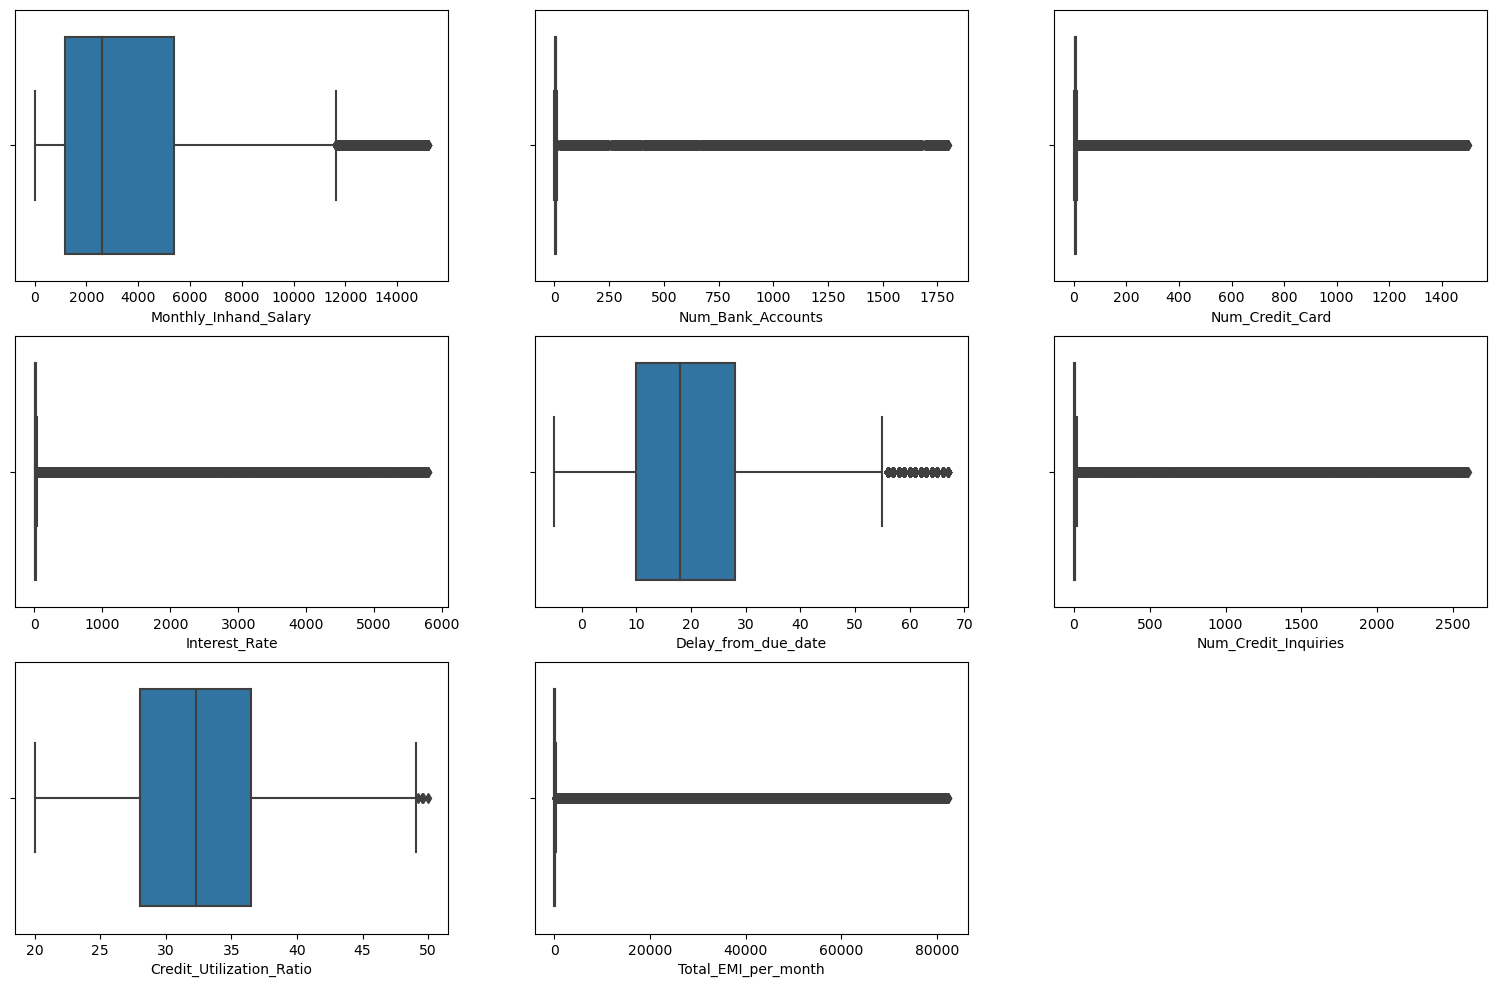

In [112]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=credit[c])
    i+=1

**Outlier detection and removal using 3 standard deviation**

In [113]:
def ThreeStandardDeviation(DFcolumns):
    lower_limit=DFcolumns.mean()-3*DFcolumns.std()
    upper_limit=DFcolumns.mean()+3*DFcolumns.std()
    return lower_limit,upper_limit

In [114]:
lower_limit,upper_limit=ThreeStandardDeviation(credit['Credit_Utilization_Ratio'])

In [115]:
credit=credit[(credit['Credit_Utilization_Ratio']>lower_limit) & (credit['Credit_Utilization_Ratio']<upper_limit)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99997,June,25,Mechanic,39629,3359,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24,High_spent_Large_value_payments,516,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


**Using IQR technique**

In [116]:

def iqr_techniques(DFcolumns):
    Q1=np.percentile(DFcolumns,25)
    Q3=np.percentile(DFcolumns,75)
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+ (1.5*IQR)
    return lower_range,upper_range

In [117]:
lower_range,upper_range=iqr_techniques(credit['Monthly_Inhand_Salary'])

In [118]:
credit=credit[(credit['Monthly_Inhand_Salary']>lower_range) & (credit['Monthly_Inhand_Salary']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99997,June,25,Mechanic,39629,3359,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24,High_spent_Large_value_payments,516,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [119]:
lower_range,upper_range=iqr_techniques(credit['Delay_from_due_date'])

In [120]:
credit=credit[(credit['Delay_from_due_date']>lower_range) & (credit['Delay_from_due_date']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99997,June,25,Mechanic,39629,3359,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24,High_spent_Large_value_payments,516,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [121]:
lower_range,upper_range=iqr_techniques(credit['Num_Bank_Accounts'])

In [122]:
credit=credit[(credit['Num_Bank_Accounts']>lower_range) & (credit['Num_Bank_Accounts']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99997,June,25,Mechanic,39629,3359,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24,High_spent_Large_value_payments,516,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [123]:
lower_range,upper_range=iqr_techniques(credit['Num_Credit_Card'])

In [124]:
credit=credit[(credit['Num_Credit_Card']>lower_range) & (credit['Num_Credit_Card']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99997,June,25,Mechanic,39629,3359,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24,High_spent_Large_value_payments,516,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [125]:

lower_range,upper_range=iqr_techniques(credit['Interest_Rate'])

In [126]:
credit=credit[(credit['Interest_Rate']>lower_range) & (credit['Interest_Rate']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,39.323569,31 Years and 5 Months,No,35.104023,140,High_spent_Medium_value_payments,410,Poor
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [127]:
lower_range,upper_range=iqr_techniques(credit['Num_Credit_Inquiries'])

In [128]:
credit=credit[(credit['Num_Credit_Inquiries']>lower_range) & (credit['Num_Credit_Inquiries']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,39.323569,31 Years and 5 Months,No,35.104023,140,High_spent_Medium_value_payments,410,Poor
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


In [129]:
lower_range,upper_range=iqr_techniques(credit['Total_EMI_per_month'])

In [130]:
credit=credit[(credit['Total_EMI_per_month']>lower_range) & (credit['Total_EMI_per_month']<upper_range)]
credit

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,39.323569,31 Years and 5 Months,No,35.104023,140,High_spent_Medium_value_payments,410,Poor
99995,April,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,34.663572,31 Years and 6 Months,No,35.104023,60,High_spent_Large_value_payments,479,Poor
99996,May,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Unknown,502.38,40.565631,31 Years and 7 Months,No,35.104023,54,High_spent_Medium_value_payments,496,Poor
99998,July,25,Mechanic,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,252,Low_spent_Large_value_payments,319,Standard


**After removing outliers**

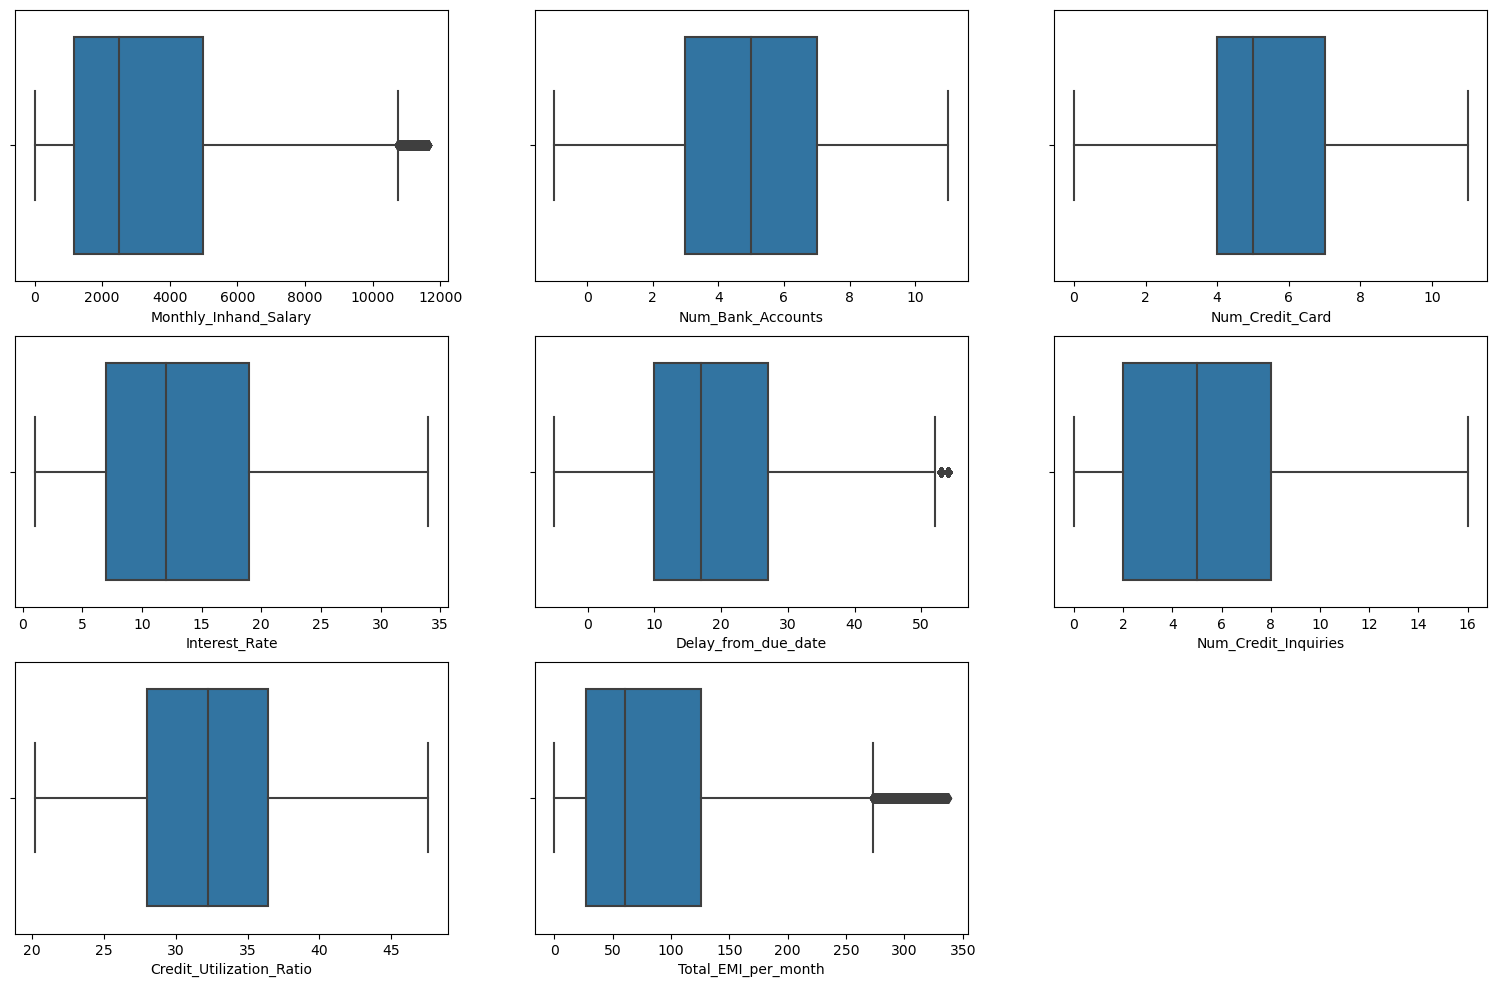

In [131]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=credit[c])
    i+=1

In [65]:
credit.to_csv(r'C:\Users\USER\Desktop\Priya\credit_score\newfile1.csv')

<h2 style='color:orange'>Data Visualization</h2>

**(1) Correlation Heatmap Visualization.**

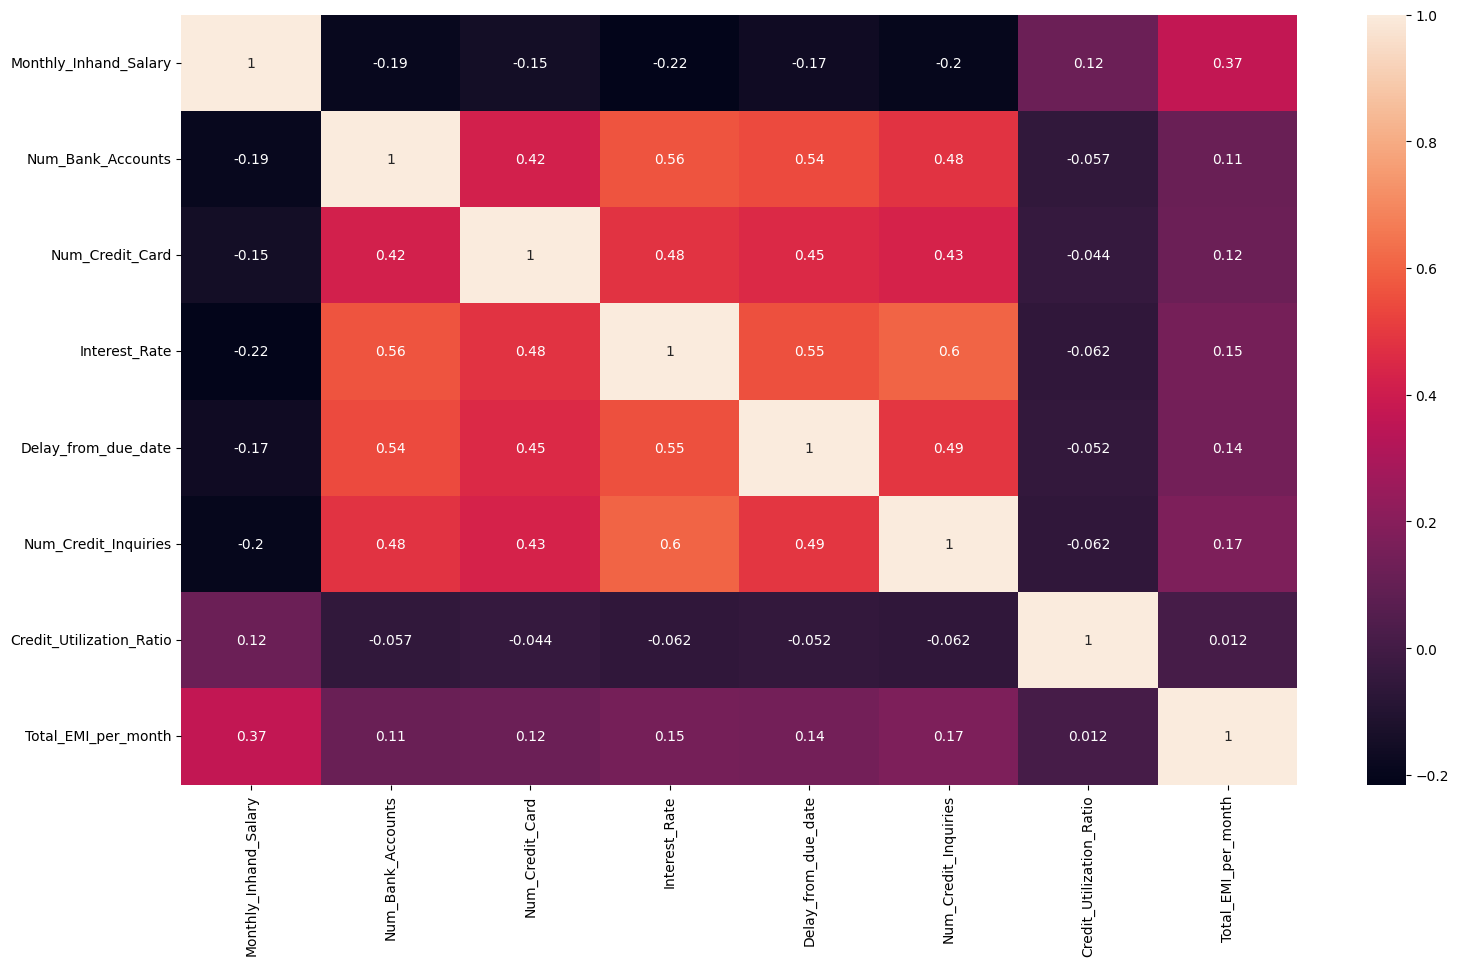

In [38]:
plt.figure(figsize=(18, 10))
sns.heatmap(credit.select_dtypes(include='number').corr(), annot = True);

**Observations**
* Positive correlation: On-time payments and high credit scores.
* Negative correlation: Debt-to-income ratio and credit scores.

---

**(2) Pair Plot Visualization**

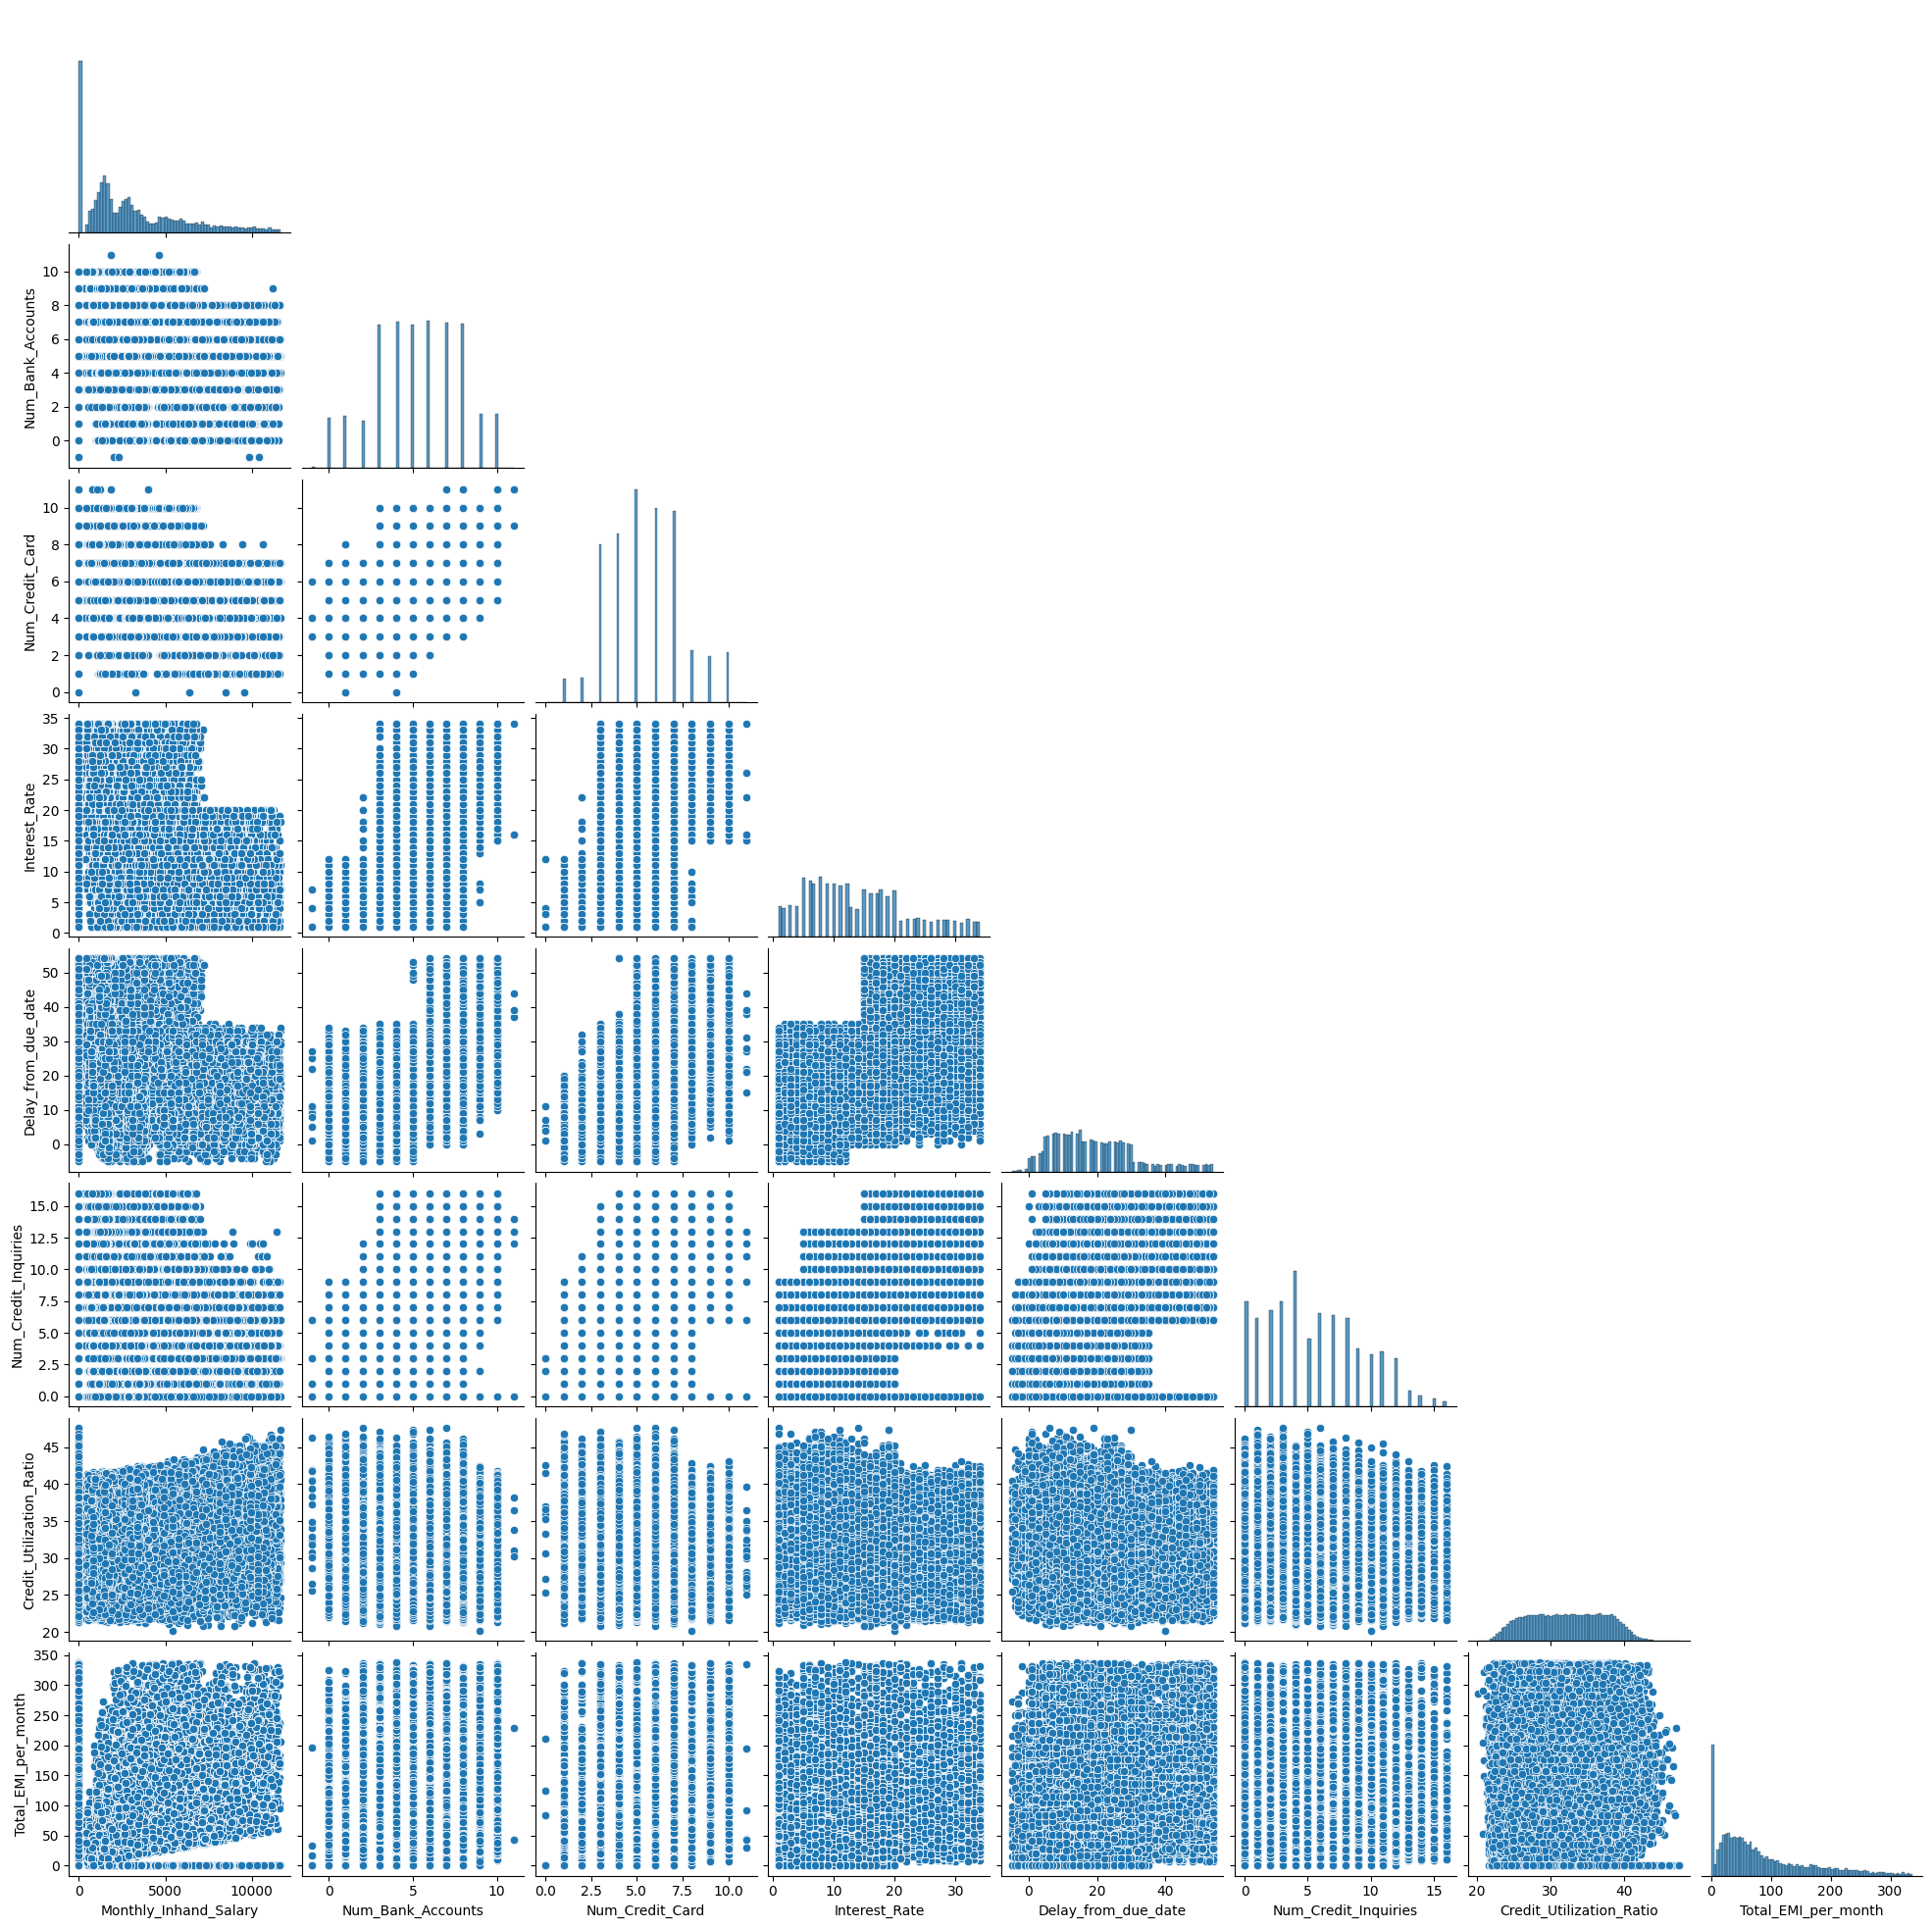

In [39]:
sns.pairplot(credit, corner=True);

**Observations**
* Distinct Clusters: Clear separation of credit score categories in some pairs.
* Linear Trends: Strong linear relationships in features like income vs. credit history.
* Outliers: Notable outliers in features such as debt and credit utilization.
* Overlapping Regions: Some feature pairs show overlap between categories.
* Feature Interactions: Significant interactions between features affecting credit scores.

**(3)Destribution of interest rate of credit score using histrogram**

Text(0.5, 1.0, 'Distribution of Interest Rate')

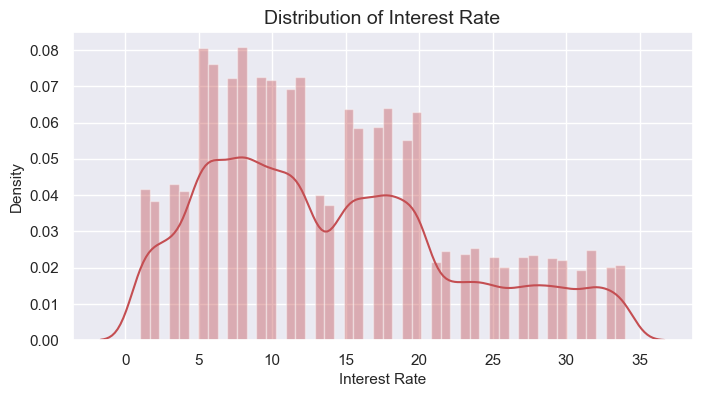

In [ ]:
plt.figure(figsize=(8,4))
sns.set_theme(style='darkgrid')
sns.distplot(x=credit['Interest_Rate'],color='r')
plt.xlabel('Interest Rate', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.title('Distribution of Interest Rate',fontsize=14)

**Observations**
* **Range:** Interest rates range from 1 to 34, with a high concentration between 3.5 to 21.
* **Histogram Peak:** The histogram peaks between 6 and 12, indicating that the majority of high credit rates fall within this range.
* **Impact on Classification:** Higher rates in this peak range could be significant for credit score classification, reflecting a strong relationship between interest rates and credit scores.







**(4)Credit score distribution using pie chart**

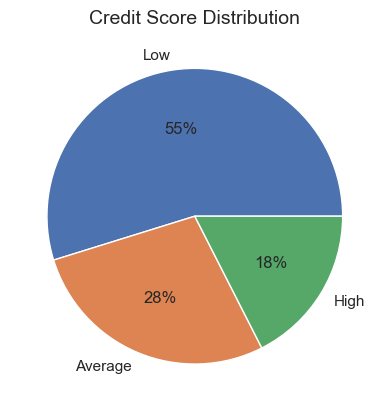

In [ ]:
class_counts=credit['Credit_Score'].value_counts()
labels=['Low','Average','High']
values=class_counts.values
plt.pie(values,labels=labels,autopct='%1.0f%%')
plt.title("Credit Score Distribution",fontsize=14)
plt.show()


**Observation**
* **Low Credit Score:**
55% of the dataset falls into the low credit score category.
* **Average Credit Score:**
28% of the dataset falls into the average credit score category.
* **High Credit Score:**
18% of the dataset falls into the high credit score category.
* **Key Insight:**
Predominance of Low Credit Scores: The majority of the dataset has low credit scores, indicating a potential imbalance that may need addressing in the classification model.

**(5)Bar graph showing the value counts of the column - Occupation**

In [ ]:
occupation=credit['Occupation'].value_counts(dropna = False)
occupation.columns=['Occupation','Total']
occupation

Occupation
_______          5660
Lawyer           5328
Architect        5124
Scientist        5019
Mechanic         5018
Media_Manager    5011
Engineer         5002
Developer        4993
Journalist       4963
Doctor           4919
Entrepreneur     4915
Teacher          4895
Accountant       4894
Writer           4802
Manager          4696
Musician         4654
Name: count, dtype: int64

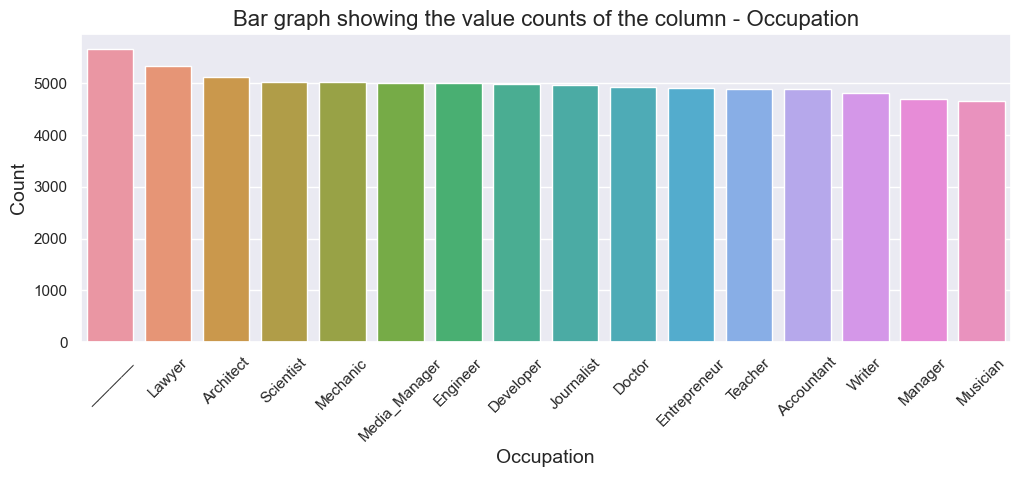

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=occupation.index, y=occupation.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Observation**
* **Highest Count:** "Occupation" label has the highest count (5660).
* **Top Occupations:** Lawyer (5328), Architect (5124), Scientist (5019).
* **Balanced Mid-Range:** Several occupations have similar counts around 4900-5100.
* **Lowest Count:** Musician (4654) is the lowest among listed specific occupations.

**(6)Payment behaviour of each credit score using count plot**

In [ ]:
payment_of_min=credit['Payment_Behaviour'].value_counts().reset_index()
payment_of_min.columns=['Payment_Behaviour','Total']
payment_of_min

,Payment_Behaviour,Total
0,Low_spent_Small_value_payments,20920
1,High_spent_Medium_value_payments,13980
2,Low_spent_Medium_value_payments,10849
3,High_spent_Large_value_payments,10508
4,High_spent_Small_value_payments,9174
5,Low_spent_Large_value_payments,8379
6,!@9#%8,6083


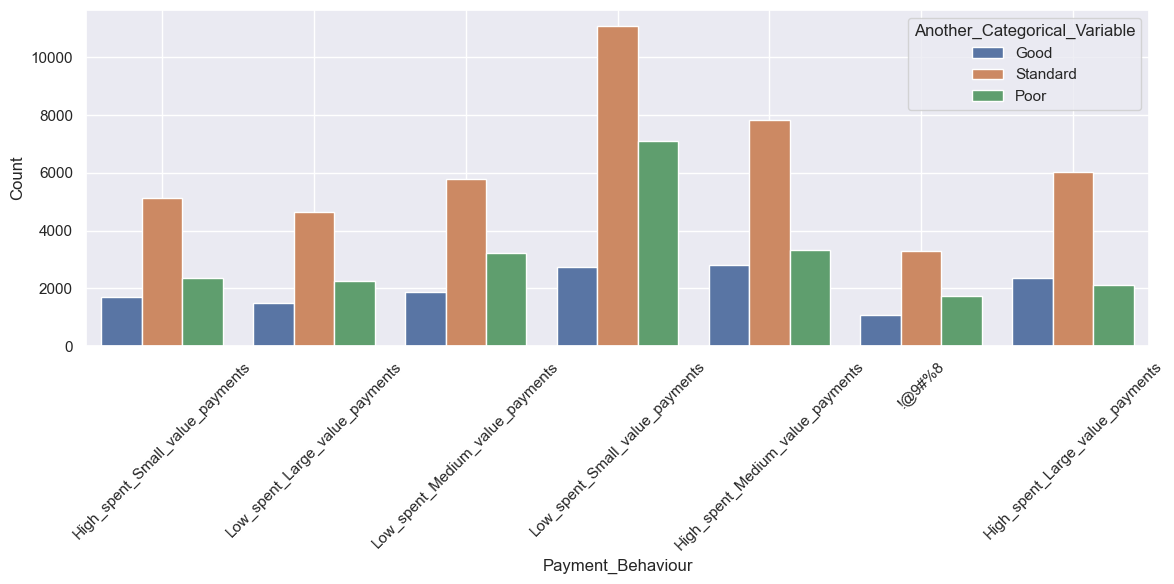

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=credit)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation**

**1.)Most Common Behavior:** "Low_spent_Small_value_payments" has the highest count (20920).

**2.)High Spend, Medium & Large Payments:** "High_spent_Medium_value_payments" (13980) and "High_spent_Large_value_payments" (10508) are significant.

**3.)Anomalous Label:** "!@9#%8" appears as an outlier or error (6083).

**4.)Balanced Distribution:** Counts gradually decrease across other categories.

In [ ]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<h2 style='color:brown'>Modeling & Accuracy Check</h2>

In [132]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79893 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79893 non-null  object 
 1   Age                       79893 non-null  int32  
 2   Occupation                79893 non-null  object 
 3   Annual_Income             79893 non-null  int32  
 4   Monthly_Inhand_Salary     79893 non-null  int64  
 5   Num_Bank_Accounts         79893 non-null  int64  
 6   Num_Credit_Card           79893 non-null  int64  
 7   Interest_Rate             79893 non-null  int64  
 8   Num_of_Loan               79893 non-null  int32  
 9   Type_of_Loan              79893 non-null  object 
 10  Delay_from_due_date       79893 non-null  int64  
 11  Num_of_Delayed_Payment    79893 non-null  int32  
 12  Changed_Credit_Limit      79893 non-null  object 
 13  Num_Credit_Inquiries      79893 non-null  int64  
 14  Credit_Mix 

In [133]:
credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,Good
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,Good
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,Good
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,Good
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,Good


In [134]:
x=credit.drop(['Credit_Score'],axis=1)

In [135]:
month_l=LabelEncoder().fit_transform(x['Month'])

In [136]:
x.Month=month_l

In [137]:
Occupation_l=LabelEncoder().fit_transform(x['Occupation'])

In [138]:
x.Occupation=Occupation_l

In [139]:
Types_of_loan=LabelEncoder().fit_transform(x['Type_of_Loan'])

In [167]:
x.Type_of_Loan=Types_of_loan

In [141]:
Change_CREDIT=LabelEncoder().fit_transform(x['Changed_Credit_Limit'])

In [142]:
x.Changed_Credit_Limit=Change_CREDIT

In [143]:
credit_mix=LabelEncoder().fit_transform(x['Credit_Mix'])

In [144]:
x.Credit_Mix=credit_mix

In [145]:
outstanding_debit=LabelEncoder().fit_transform(x['Outstanding_Debt'])

In [146]:
x.Outstanding_Debt=outstanding_debit

In [147]:
credit_history_age=LabelEncoder().fit_transform(x['Credit_History_Age'])

In [148]:
x.Credit_History_Age=credit_history_age

In [149]:
x.Credit_History_Age=x['Credit_History_Age'].replace('nan',0)

In [150]:
pyment_of_min_amount=LabelEncoder().fit_transform(x['Payment_of_Min_Amount'])

In [151]:
x.Payment_of_Min_Amount=pyment_of_min_amount

In [152]:
Payment_Behaviour  =LabelEncoder().fit_transform(x['Payment_Behaviour'])

In [153]:
x.Payment_Behaviour=Payment_Behaviour

In [154]:
x

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3,23,12,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4,3,11053,26.822620,180,1,49.574949,80,2,312
1,2,23,12,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4,1,11053,31.944960,404,1,49.574949,118,3,285
2,6,500,12,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4,1,11053,28.609352,184,1,49.574949,82,4,331
3,0,23,12,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4,1,11053,31.377862,185,1,49.574949,199,5,223
4,7,23,12,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4,1,11053,24.797347,186,1,49.574949,41,1,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6,25,9,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,3,3,9229,39.323569,306,1,35.104023,140,1,410
99995,0,25,9,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,3,3,9229,34.663572,307,1,35.104023,60,0,479
99996,7,25,9,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,3,3,9229,40.565631,308,1,35.104023,54,1,496
99998,4,25,9,39629,3359,4,6,7,2,"Auto Loan, and Student Loan",...,3,1,9229,33.638208,310,1,35.104023,252,3,319


In [160]:
credit['Credit_Score']=LabelEncoder().fit_transform(credit['Credit_Score'])

In [161]:
credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80,High_spent_Small_value_payments,312,0
1,February,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,unknown,No,49.574949,118,Low_spent_Large_value_payments,285,0
2,March,500,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,82,Low_spent_Medium_value_payments,331,0
3,April,23,Scientist,19114,0,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199,Low_spent_Small_value_payments,223,0
4,May,23,Scientist,19114,1824,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41,High_spent_Medium_value_payments,341,0


In [162]:
y=credit.Credit_Score
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int32

In [168]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [169]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [170]:
model.score(xtest,ytest)

0.5405219350397397

In [171]:
y_truth=ytest
y_pred=model.predict(xtest)

In [172]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

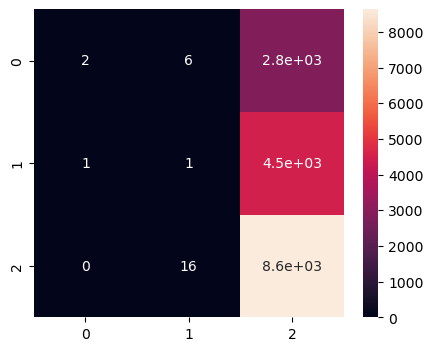

In [173]:
plt.figure(figsize=(5,4))
seaborn.heatmap(cm,annot=True)

In [178]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [179]:
model.score(xtest,ytest)

0.6748232054571626

In [180]:
y_truth=ytest
y_pred=model.predict(xtest)

In [181]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

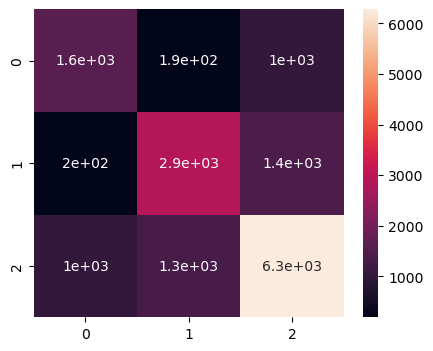

In [182]:
plt.figure(figsize=(5,4))
seaborn.heatmap(cm,annot=True)

In [183]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [184]:
model.score(xtest,ytest)

0.7839664559734651

In [185]:
y_truth=ytest
y_pred=model.predict(xtest)

In [186]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

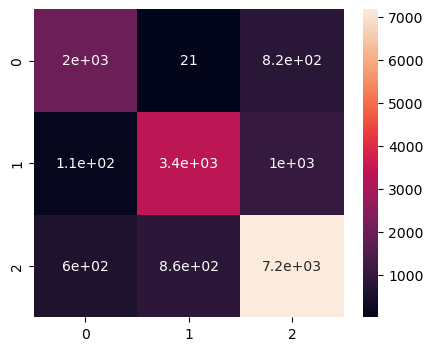

In [187]:
plt.figure(figsize=(5,4))
seaborn.heatmap(cm,annot=True)

In [188]:
from sklearn.naive_bayes import GaussianNB

In [189]:
model=GaussianNB()

In [190]:
model.fit(xtrain,ytrain)

GaussianNB()

In [191]:
model.score(xtest,ytest)

0.5429626384629826

In [192]:
y_truth=ytest
y_pred=model.predict(xtest)

In [193]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

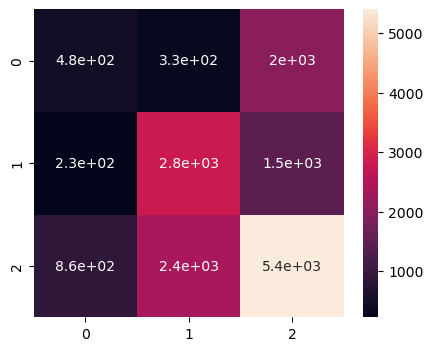

In [194]:
plt.figure(figsize=(5,4))
seaborn.heatmap(cm,annot=True)

In [201]:
# Create a Random Forest Classifier
base_model =LogisticRegression()

# Create a Bagging Classifier using the Random Forest
bagging_model = BaggingClassifier(base_estimator=base_model)

# Train the model
bagging_model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=LogisticRegression())

In [205]:
# Make predictions

y_truth=ytest
y_pred = bagging_model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(y_truth, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.2f}')

Accuracy of Bagging Classifier: 0.54


In [206]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

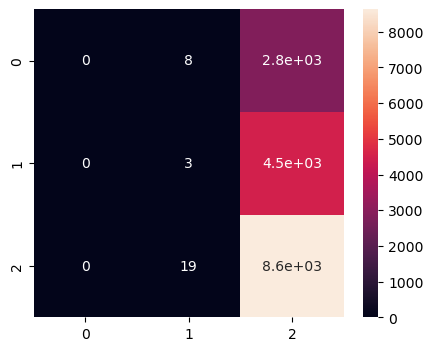

In [207]:
plt.figure(figsize=(5,4))
seaborn.heatmap(cm,annot=True)

In [208]:
# Create a base Random Forest Classifier
base_model =LogisticRegression()
# Create an AdaBoost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=base_model)

# Train the model
adaboost_model.fit(xtrain, ytrain)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [209]:
y_truth=ytest
y_pred = adaboost_model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(y_truth, y_pred)
print(f'Accuracy of AdaBoost Classifier: {accuracy:.2f}')

Accuracy of AdaBoost Classifier: 0.54


In [210]:
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(base_estimator=LogisticRegression(random_state=42), random_state=42)
}

In [211]:
param_grids = {
    'logistic_regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    }
}

In [ ]:
best_models = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=50,  # Increase number of iterations
        cv=cv,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_models[model_name] = {
        'best_estimator': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }

    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_}")

Training model: logistic_regression
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# Display the best parameters and score for each model
for model_name, model_info in best_models.items():
    print(f"\nBest Model: {model_name}")
    print(f"Best Parameters: {model_info['best_params']}")
    print(f"Best Cross-Validation Accuracy: {model_info['best_score']:.3f}")

In [36]:
model=RandomForestClassifier({'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10})

In [148]:
credit.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0,3,...,Good,809.98,31.94496,unknown,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [37]:
x=credit.drop(['Credit_Score','ID','Customer_ID','Name','SSN'],axis=1)
y=credit.Credit_Score

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79893 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79893 non-null  object 
 1   Age                       79893 non-null  object 
 2   Occupation                79893 non-null  object 
 3   Annual_Income             79893 non-null  object 
 4   Monthly_Inhand_Salary     79893 non-null  int64  
 5   Num_Bank_Accounts         79893 non-null  int64  
 6   Num_Credit_Card           79893 non-null  int64  
 7   Interest_Rate             79893 non-null  int64  
 8   Num_of_Loan               79893 non-null  object 
 9   Type_of_Loan              79893 non-null  object 
 10  Delay_from_due_date       79893 non-null  int64  
 11  Num_of_Delayed_Payment    79893 non-null  object 
 12  Changed_Credit_Limit      79893 non-null  object 
 13  Num_Credit_Inquiries      79893 non-null  int64  
 14  Credit_Mix 

In [41]:
x.Age.unique()

array(['23', '-500', '28_', ..., '6476', '2263', '1342'], dtype=object)

In [83]:
x.Age=x.Age.replace({'47_':'47'})

In [84]:
x.Age=x.Age.astype(int)

In [242]:
def can_convert_to_int(value):
    try:
        # Convert to float first to handle numeric strings and then to int
        # This handles cases like '80000.5' by converting to float and checking if it is a whole number
        if value is None:
            return False
        # Convert value to float and then to int, checking if they match
        return int(float(value)) == float(value)
    except (ValueError, TypeError):
        return False

# Apply the conversion check function to each value in the 'ANNUAL_INCOME' column
x['Annual_Income'] = x['Annual_Income'].apply(can_convert_to_int)

# Filter rows where conversion to int is not possible
non_convertible = x[~x['Annual_Income']]

In [245]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79893 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79893 non-null  object 
 1   Age                       79893 non-null  int32  
 2   Occupation                79893 non-null  object 
 3   Annual_Income             79893 non-null  int32  
 4   Monthly_Inhand_Salary     79893 non-null  int64  
 5   Num_Bank_Accounts         79893 non-null  int64  
 6   Num_Credit_Card           79893 non-null  int64  
 7   Interest_Rate             79893 non-null  int64  
 8   Num_of_Loan               79893 non-null  object 
 9   Type_of_Loan              79893 non-null  object 
 10  Delay_from_due_date       79893 non-null  int64  
 11  Num_of_Delayed_Payment    79893 non-null  object 
 12  Changed_Credit_Limit      79893 non-null  object 
 13  Num_Credit_Inquiries      79893 non-null  int64  
 14  Credit_Mix 

In [240]:
x.Annual_Income=x.Annual_Income.replace({'20574.47':'20574'})

In [244]:
x.Annual_Income=x.Annual_Income.astype(int)

In [43]:
x.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Engineer',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [212]:
# Identify numerical and categorical columns
numeric_features = x.select_dtypes(include=['number']).columns.tolist()

categorical_features = x.select_dtypes(include=['object']).columns.tolist()

In [213]:


# Preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [214]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=10))
])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [216]:
# Assuming X_train is your DataFrame
for column in X_train.columns:
    types = X_train[column].apply(type).unique()
    if len(types) > 1:
        print(f"Column '{column}' has mixed types: {types}")


Column 'Monthly_Balance' has mixed types: [<class 'str'> <class 'float'>]


In [217]:
# Convert all values in a specific column to strings
X_train['Monthly_Balance'] = X_train['Monthly_Balance'].astype(str)

# Alternatively, if you want to convert all to numeric and handle errors
X_train['Monthly_Balance'] = pd.to_numeric(X_train['Monthly_Balance'], errors='coerce')


In [158]:
# Fill missing values with a specific value, like 0 or the median
X_train['Monthly_Balance'].fillna(0, inplace=True)


In [160]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Delay_from_due_date',
                                                   'Num_Credit_Inquiries',
                                                   'Credit_Utilization_Ratio',
                                                   'Total_EMI_per_month']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Month', 'Age', 'Occupation',
                                                   'Annual_Income',
                                                   'Num_of_Loan',
                                                   'Type_of_Loan',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Credit_Mix',
                                                   'Outstanding_Debt',
                                                   'Credit_History_Age',
                                                   'Payment_of_Min_Amount',
                                                   'Amount_invested_monthly',
                                                   'Payment_Behaviour',
                                                   'Monthly_Balance'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50))])

In [161]:
joblib.dump(model_pipeline,'model_pipeline.joblib')

['model_pipeline.joblib']

In [162]:
loaded_pipeline=joblib.load('model_pipeline.joblib')